# Unwind Platform Data Analysis: Comprehensive Univariate Analysis

This notebook contains a thorough univariate analysis of all variables from the survey data collected for the Unwind platform. As explicitly required by the academic project guidelines, each variable will be individually analyzed to provide a complete characterization of the dataset before proceeding to relationship analysis.

## Objectives
- Conduct detailed univariate analysis of every variable in the dataset
- Visualize and describe the distribution of each variable independently
- Provide statistical measures for all quantitative variables
- Categorize and count occurrences for all categorical variables
- Prepare foundational insights for subsequent bivariate analysis

`Note: All visualizations and analyses are presented in Portuguese to meet academic requirements.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_theme(font_scale=1.2)

# For better visualization of plots in dark mode
plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['figure.facecolor'] = '#f0f0f0'

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

## Loading the Cleaned Dataset

Loading the processed data prepared in the previous notebook.

In [2]:
df = pd.read_csv('../data/processed/clean_unwind_responses.csv')

# Convert categorical columns back to category type
categorical_columns = [
    'sexo', 'estado_civil', 'escolaridade', 'regiao', 'ocupacao', 
    'sistema_operacional', 'uso_app_similar', 'opiniao_proposta',
    'usaria_app', 'indicaria_app', 'inclusao_livros', 'funcionalidades'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset loaded successfully with 54 rows and 17 columns


,idade,sexo,estado_civil,escolaridade,regiao,ocupacao,sistema_operacional,dias_entretenimento,horas_filmes,horas_series,horas_jogos,uso_app_similar,opiniao_proposta,usaria_app,indicaria_app,inclusao_livros,funcionalidades
0,21,Masculino,Solteiro(a),Ensino superior (incompleto),Capital de São Paulo,Estudante,iOS,2,0,2,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes;Algori...
1,17,Masculino,Solteiro(a),Ensino médio (incompleto),Capital de São Paulo,Estudante,Android,5,1,1,4,"Sim, uso frequentemente",Muito interessante,Sim,Sim,Seria ótimo!,Algoritmo de recomendação futura;Feed social c...
2,20,Masculino,Solteiro(a),Ensino superior (incompleto),Região do ABCD,Estudante,iOS,7,2,3,4,"Sim, mas raramente",Muito interessante,Sim,Sim,"Seria interessante, mas não é algo essencial p...",Algoritmo de recomendação futura;Feed social c...
3,44,Feminino,Casado(a),Ensino médio (completo),Capital de São Paulo,Autônomo(a),Android,7,10,10,0,Não conheço nenhum,Interessante,Sim,Sim,Seria ótimo!,Aba pessoal com suas avaliações e likes
4,21,Feminino,Solteiro(a),Ensino superior (incompleto),Capital de São Paulo,Estudante,iOS,1,1,1,0,Não tenho interesse,Muito interessante,Não,Sim,Seria ótimo!,Algoritmo de recomendação futura


## Univariate Analysis: Qualitative Variables

### Gender (Sexo)

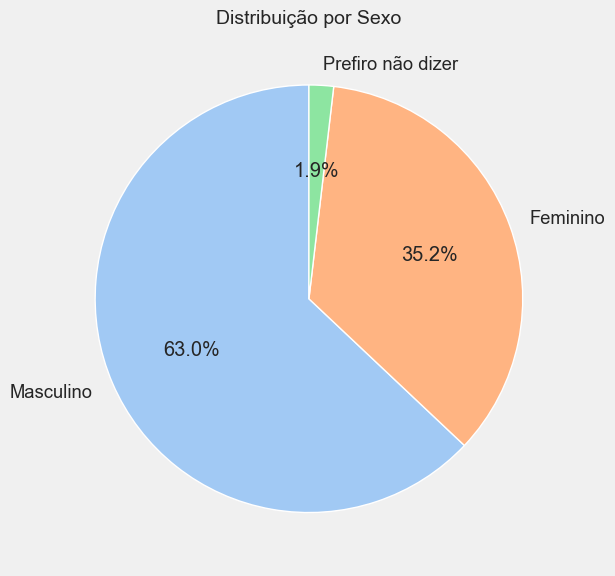

Distribuição por Sexo:
Masculino: 34 respondentes (63.0%)
Feminino: 19 respondentes (35.2%)
Prefiro não dizer: 1 respondentes (1.9%)


In [3]:
plt.figure(figsize=(10, 6))
gender_counts = df['sexo'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribuição por Sexo', fontsize=14)
plt.tight_layout()

plt.savefig('../images/gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Sexo:")
for gender, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{gender}: {count} respondentes ({percentage:.1f}%)")

#### Gender Distribution Description

- The sample consists of 63.0% male respondents, 35.2% female respondents, and 1.9% who preferred not to disclose their gender.
- Male respondents form the largest group, representing approximately two-thirds of the sample.
- The gender distribution shows an imbalance, with significantly more male participants than female or undisclosed.

### Marital Status (Estado Civil)

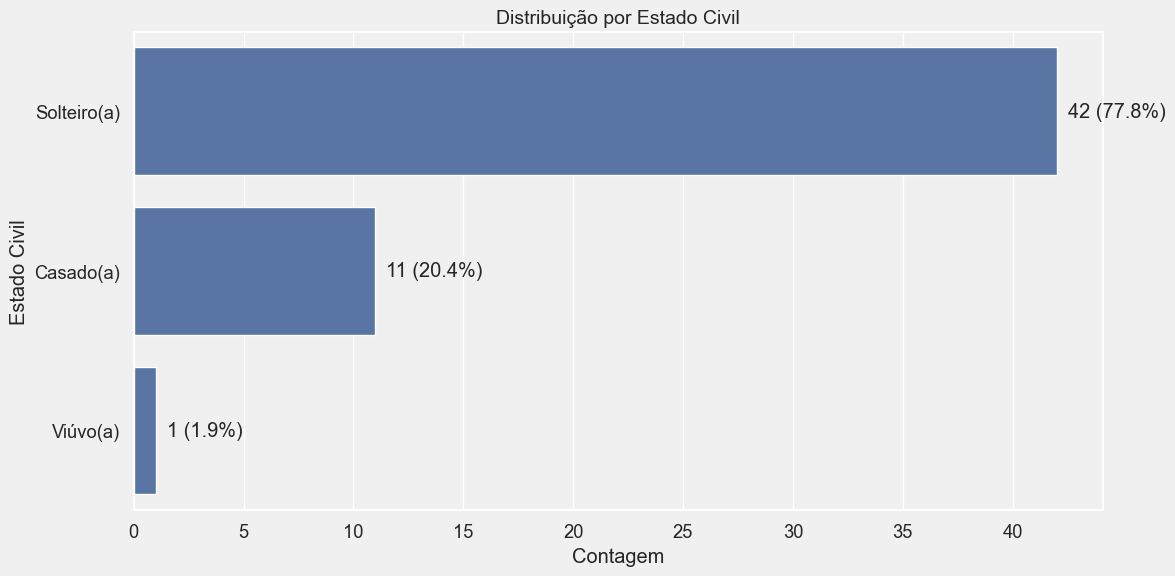

Distribuição por Estado Civil:
Solteiro(a): 42 respondentes (77.8%)
Casado(a): 11 respondentes (20.4%)
Viúvo(a): 1 respondentes (1.9%)


In [4]:
plt.figure(figsize=(12, 6))

estado_civil_order = ['Solteiro(a)', 'Casado(a)', 'Viúvo(a)']
marital_counts = df['estado_civil'].value_counts().reindex(estado_civil_order)

sns.barplot(y=marital_counts.index, x=marital_counts.values)
plt.title('Distribuição por Estado Civil', fontsize=14)
plt.ylabel('Estado Civil')
plt.xlabel('Contagem')

total = len(df)
for i, count in enumerate(marital_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/marital_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Estado Civil:")
for status, count in marital_counts.items():
    percentage = (count / total) * 100
    print(f"{status}: {count} respondentes ({percentage:.1f}%)")

#### Marital Status Distribution Description

- The majority of respondents (77.8%, n=42) are single ("Solteiro(a)").
- Married ("Casado(a)") individuals represent 20.4% of the sample (n=11).
- Widowed ("Viúvo(a)") respondents account for 1.9% of the sample (n=1).
- The distribution shows a strong predominance of single individuals, aligning with the predominantly young age profile observed earlier.

### Education Level (Escolaridade)

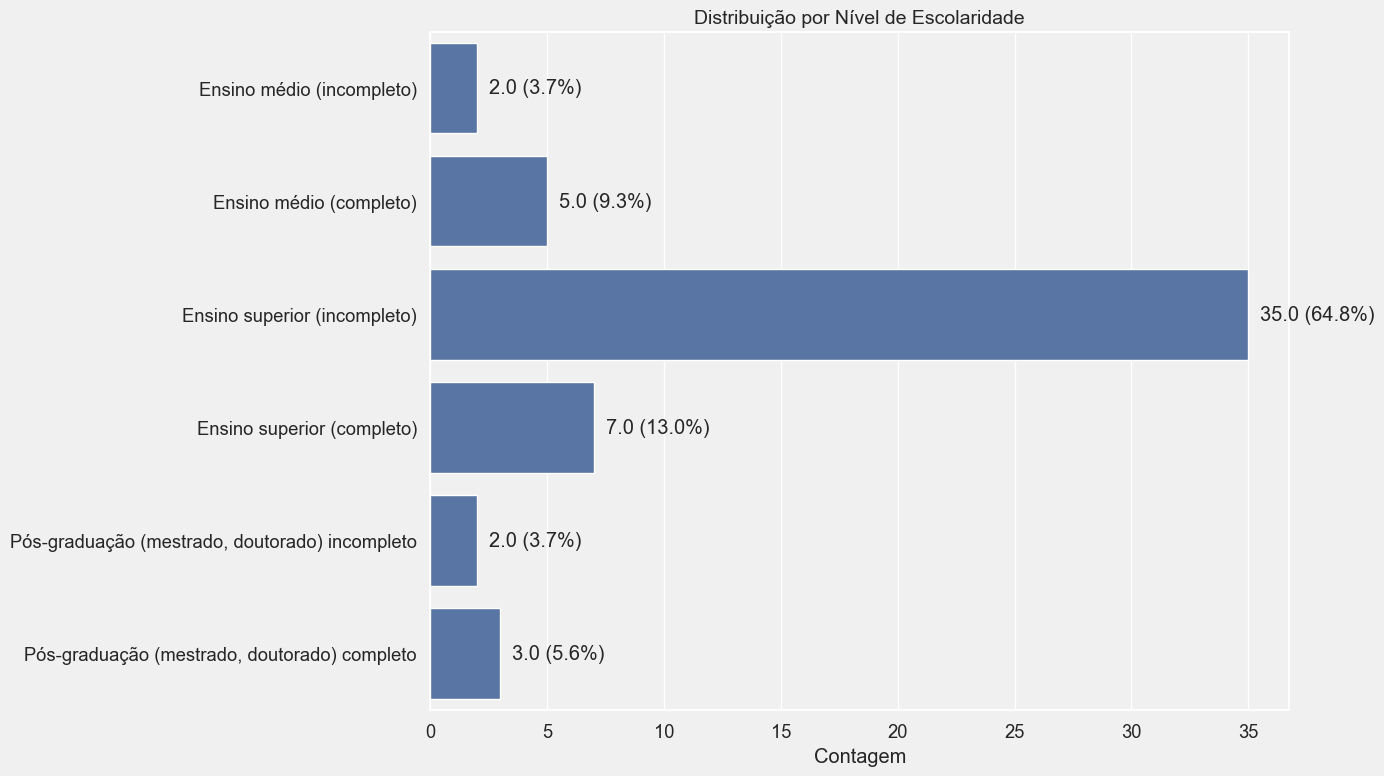

Distribuição por Nível de Escolaridade:
Ensino médio (incompleto): 2.0 respondentes (3.7%)
Ensino médio (completo): 5.0 respondentes (9.3%)
Ensino superior (incompleto): 35.0 respondentes (64.8%)
Ensino superior (completo): 7.0 respondentes (13.0%)
Pós-graduação (mestrado, doutorado) incompleto: 2.0 respondentes (3.7%)
Pós-graduação (mestrado, doutorado) completo: 3.0 respondentes (5.6%)


In [5]:
plt.figure(figsize=(14, 8))

edu_order = [
    'Ensino fundamental (incompleto)',
    'Ensino fundamental (completo)',
    'Ensino médio (incompleto)',
    'Ensino médio (completo)',
    'Ensino superior (incompleto)',
    'Ensino superior (completo)',
    'Pós-graduação (mestrado, doutorado) incompleto',
    'Pós-graduação (mestrado, doutorado) completo'
]

edu_counts = df['escolaridade'].value_counts().reindex(edu_order).dropna()

sns.barplot(y=edu_counts.index, x=edu_counts.values)
plt.title('Distribuição por Nível de Escolaridade', fontsize=14)
plt.xlabel('Contagem')
plt.ylabel('')

total = len(df)
for i, count in enumerate(edu_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/education_level_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Nível de Escolaridade:")
for edu, count in edu_counts.items():
    percentage = (count / total) * 100
    print(f"{edu}: {count} respondentes ({percentage:.1f}%)")

#### Education Level Distribution Description

- The most common education level is "Ensino superior (incompleto)" (incomplete higher education), representing 64.8% of respondents (n=35).
- The second most common group is "Ensino superior (completo)" (complete higher education) at 13.0% (n=7).
- "Ensino médio (completo)" (complete high school) accounts for 9.3% of respondents (n=5).
- Graduate education levels, both incomplete and complete, represent 3.7% (n=2) and 5.6% (n=3) respectively.
- "Ensino médio (incompleto)" (incomplete high school) accounts for 3.7% (n=2).
- There are no respondents with elementary education (fundamental) levels.
- The distribution shows a predominance of individuals with some level of higher education (either in progress or completed), accounting for 87.1% of the sample when including graduate programs.
- This educational profile aligns with the young age demographic, suggesting a sample composed primarily of university students or recent graduates.

### Geographic Region (Região)

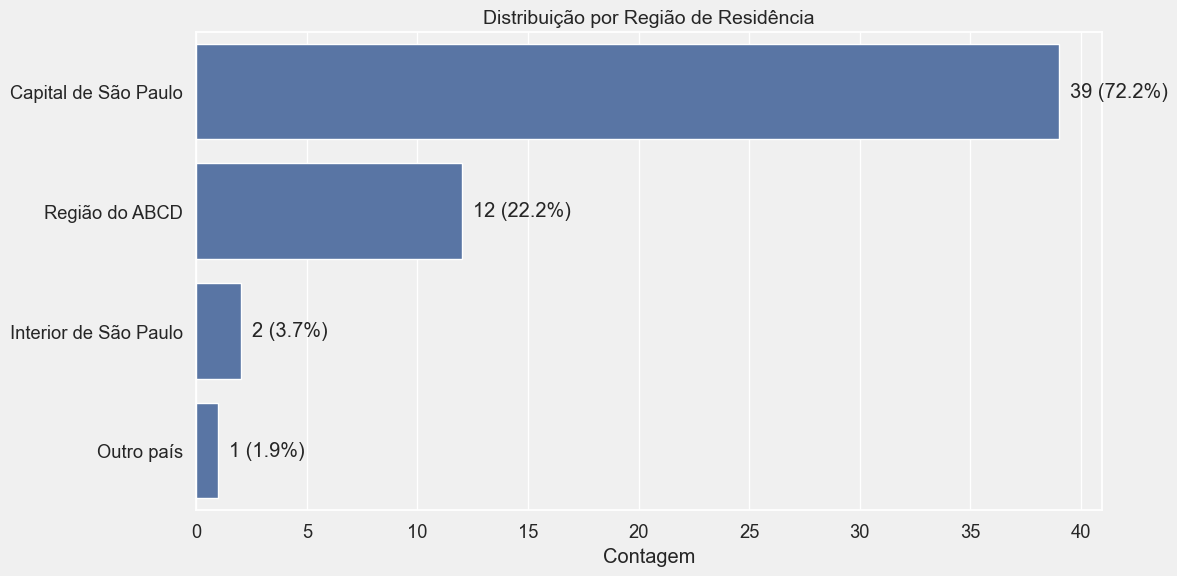

Distribuição por Região:
Capital de São Paulo: 39 respondentes (72.2%)
Região do ABCD: 12 respondentes (22.2%)
Interior de São Paulo: 2 respondentes (3.7%)
Outro país: 1 respondentes (1.9%)


In [6]:
plt.figure(figsize=(12, 6))

regiao_order = ['Capital de São Paulo', 'Região do ABCD', 'Interior de São Paulo', 'Outro país']
region_counts = df['regiao'].value_counts().reindex(regiao_order)

sns.barplot(y=region_counts.index, x=region_counts.values)
plt.title('Distribuição por Região de Residência', fontsize=14)
plt.xlabel('Contagem')
plt.ylabel('')

total = len(df)
for i, count in enumerate(region_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/region_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Região:")
for region, count in region_counts.items():
    percentage = (count / total) * 100
    print(f"{region}: {count} respondentes ({percentage:.1f}%)")

#### Geographic Region Distribution Description

- The sample shows a strong concentration in the São Paulo metropolitan area:
  - The largest portion of respondents (72.2%, n=39) reside in "Capital de São Paulo" (São Paulo city).
  - The "Região do ABCD" (metropolitan area adjacent to São Paulo) accounts for 22.2% (n=12) of respondents.
  - Combined, these two regions represent 94.4% of all survey participants, indicating a predominantly urban, São Paulo-based sample.
- There is minimal representation from other regions:
  - Only 3.7% (n=2) of respondents are from "Interior de São Paulo" (São Paulo state countryside).
  - A single respondent (1.9%) is from outside Brazil ("Outro país").
- This geographic distribution suggests that the findings may be particularly relevant for urban users in the São Paulo metropolitan area, but may not fully represent preferences of users from other regions or rural areas.
- The concentration of respondents in the São Paulo area aligns with the location of the Instituto Mauá de Tecnologia, suggesting that the sampling may have been influenced by the geographic location of the research team.

### Occupation (Ocupação)

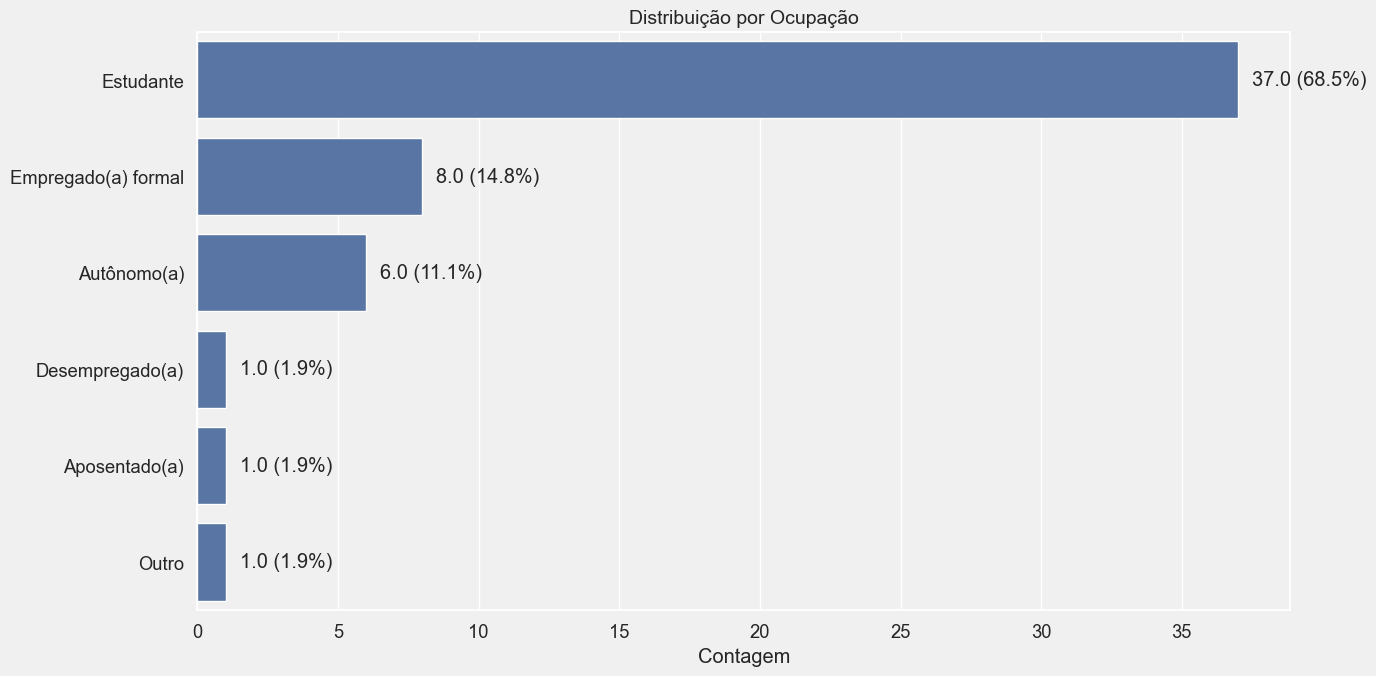

Distribuição por Ocupação:
Estudante: 37.0 respondentes (68.5%)
Empregado(a) formal: 8.0 respondentes (14.8%)
Autônomo(a): 6.0 respondentes (11.1%)
Desempregado(a): 1.0 respondentes (1.9%)
Aposentado(a): 1.0 respondentes (1.9%)
Outro: 1.0 respondentes (1.9%)


In [7]:
plt.figure(figsize=(14, 7))

ocupacao_order = [
    'Estudante', 
    'Empregado(a) formal', 
    'Autônomo(a)', 
    'Empreendedor(a)', 
    'Desempregado(a)', 
    'Aposentado(a)',
    'Outro'
]

occupation_counts = df['ocupacao'].value_counts().reindex(ocupacao_order).dropna()

sns.barplot(y=occupation_counts.index, x=occupation_counts.values)
plt.title('Distribuição por Ocupação', fontsize=14)
plt.xlabel('Contagem')
plt.ylabel('')

total = len(df)
for i, count in enumerate(occupation_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/occupation_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Ocupação:")
for occ, count in occupation_counts.items():
    percentage = (count / total) * 100
    print(f"{occ}: {count} respondentes ({percentage:.1f}%)")

#### Occupation Distribution Description

- The occupational distribution is heavily dominated by students, who constitute more than two-thirds (68.5%, n=37) of all respondents.
- Formal employees ("Empregado(a) formal") form the second largest group at 14.8% (n=8).
- Self-employed individuals ("Autônomo(a)") represent 11.1% (n=6) of the sample.
- The remaining categories each account for only 1.9% (n=1) of respondents: unemployed ("Desempregado(a)"), retired ("Aposentado(a)"), and other occupations ("Outro").
- This distribution strongly aligns with the educational profile observed earlier, where the majority of respondents had incomplete higher education, suggesting a predominantly student sample.
- The predominance of students in the sample may influence the interpretation of results regarding entertainment consumption patterns and interest in the Unwind platform, as students typically have different usage patterns and financial constraints compared to other occupational groups.

### Operating System (Sistema Operacional)

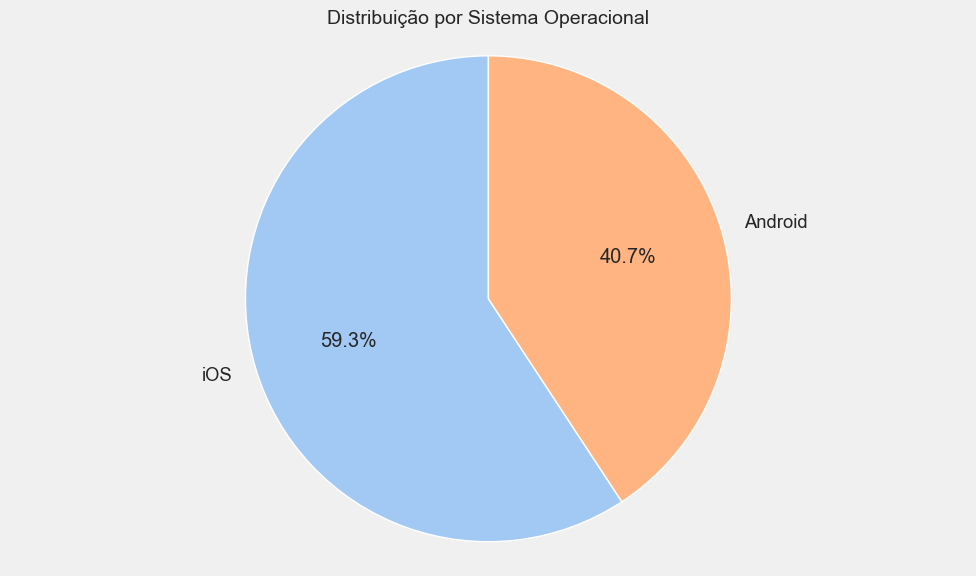

Distribuição por Sistema Operacional:
iOS: 32.0 respondentes (59.3%)
Android: 22.0 respondentes (40.7%)


In [8]:
plt.figure(figsize=(10, 6))

os_order = ['iOS', 'Android', 'Outro']

os_counts = df['sistema_operacional'].value_counts().reindex(os_order).dropna()

plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribuição por Sistema Operacional', fontsize=14)
plt.axis('equal')  

plt.tight_layout()

plt.savefig('../images/os_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição por Sistema Operacional:")
for os, count in os_counts.items():
    percentage = (count / total) * 100
    print(f"{os}: {count} respondentes ({percentage:.1f}%)")

#### Operating System Distribution Description

- The sample shows a relatively balanced distribution between the two main mobile operating systems, with a moderate preference for iOS:
    - iOS users represent the majority at 59.3% (n=32) of respondents.
    - Android users account for 40.7% (n=22) of the sample.
    - There are no users of other operating systems in the sample.
- This distribution differs somewhat from the global and Brazilian market share, where Android typically has a larger share, suggesting that the sample may skew toward a demographic with higher purchasing power (consistent with the predominance of higher education students from São Paulo).
- The higher proportion of iOS users may reflect socioeconomic factors, as iOS devices are generally more expensive and may be more common among urban respondents from the São Paulo metropolitan area.
- From a development perspective, this distribution indicates that the Unwind platform should prioritize compatibility with both iOS and Android systems to reach its target audience effectively.

### Current App Usage (Uso de App Similar)

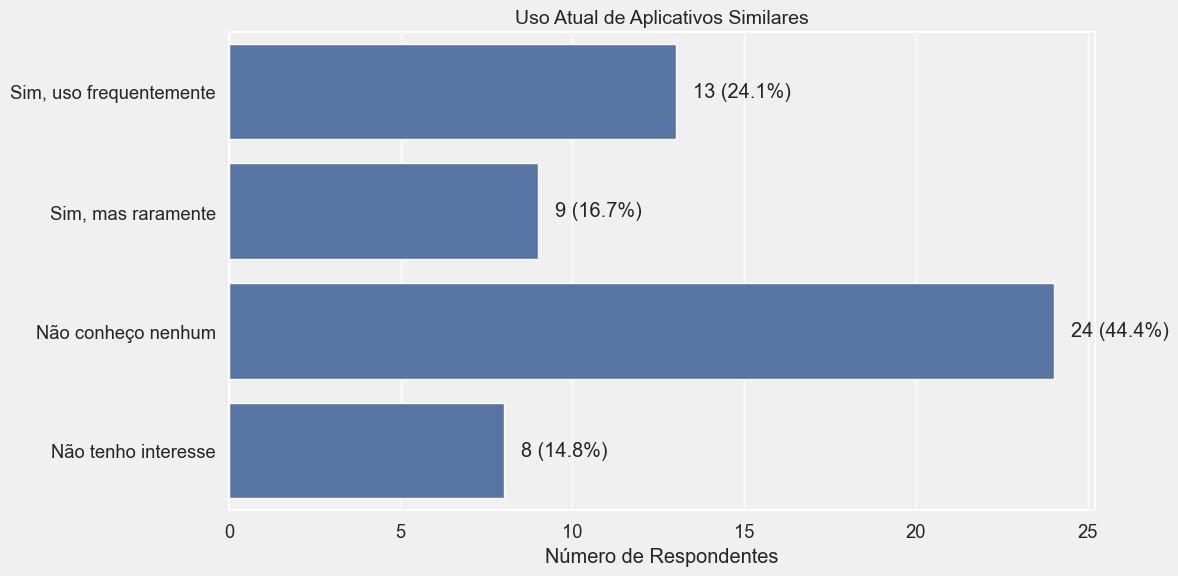

Distribuição de Uso de Aplicativos Similares:
Sim, uso frequentemente: 13 respondentes (24.1%)
Sim, mas raramente: 9 respondentes (16.7%)
Não conheço nenhum: 24 respondentes (44.4%)
Não tenho interesse: 8 respondentes (14.8%)


In [9]:
plt.figure(figsize=(12, 6))

uso_order = [
    'Sim, uso frequentemente', 
    'Sim, mas raramente', 
    'Não conheço nenhum', 
    'Não tenho interesse'
]

uso_counts = df['uso_app_similar'].value_counts().reindex(uso_order).dropna()

sns.barplot(y=uso_counts.index, x=uso_counts.values)
plt.title('Uso Atual de Aplicativos Similares', fontsize=14)
plt.xlabel('Número de Respondentes')
plt.ylabel('')

total = len(df)
for i, count in enumerate(uso_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/app_usage_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Uso de Aplicativos Similares:")
for uso, count in uso_counts.items():
    percentage = (count / total) * 100
    print(f"{uso}: {count} respondentes ({percentage:.1f}%)")

#### Current App Usage Distribution Description

- A significant portion (44.4%, n=24) of respondents indicated they "Não conheço nenhum" (don't know any) similar applications, suggesting a potential market gap or lack of awareness about existing solutions.
- Among those familiar with similar applications:
    - 24.1% (n=13) reported using them frequently ("Sim, uso frequentemente")
    - 16.7% (n=9) use them rarely ("Sim, mas raramente")
- Additionally, 14.8% (n=8) of respondents expressed no interest ("Não tenho interesse") in using similar applications.
- Overall, the results show that while 40.8% of respondents have some experience with similar applications, the majority (59.2%) either don't know of any such apps or aren't interested in them.
- This distribution suggests both an opportunity (many potential users are unfamiliar with existing solutions) and a challenge (convincing those without interest) for the Unwind platform's market positioning.

### Opinion on Unwind Proposal (Opinião sobre a Proposta)

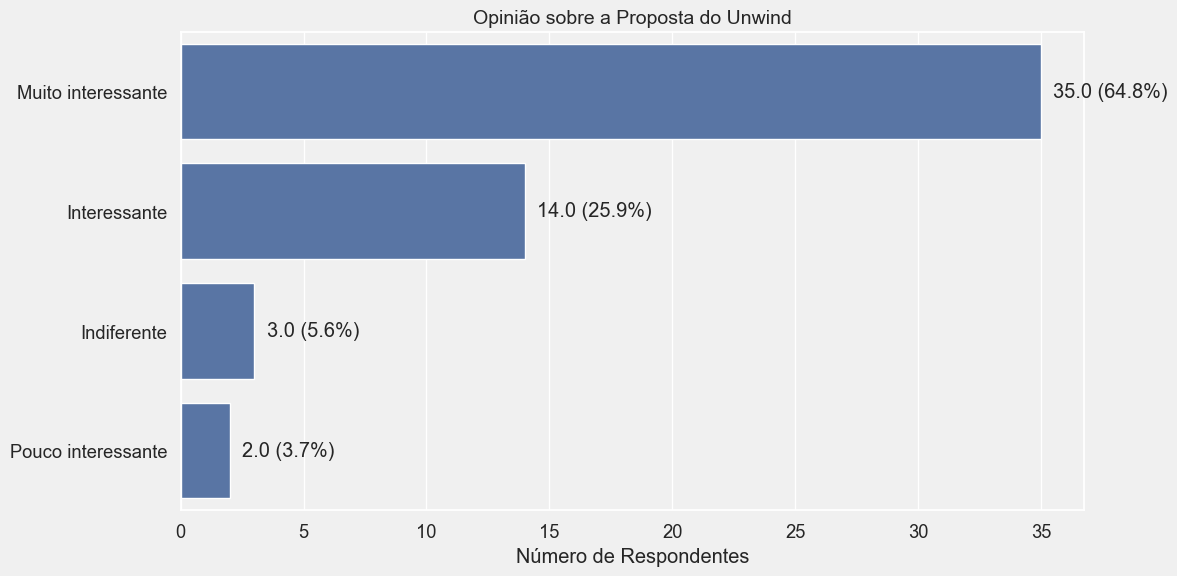

Distribuição de Opinião sobre a Proposta:
Muito interessante: 35.0 respondentes (64.8%)
Interessante: 14.0 respondentes (25.9%)
Indiferente: 3.0 respondentes (5.6%)
Pouco interessante: 2.0 respondentes (3.7%)


In [10]:
plt.figure(figsize=(12, 6))

opiniao_order = [
    'Muito interessante', 
    'Interessante', 
    'Indiferente', 
    'Pouco interessante',
    'Não gostei'
]

opiniao_counts = df['opiniao_proposta'].value_counts().reindex(opiniao_order).dropna()

sns.barplot(y=opiniao_counts.index, x=opiniao_counts.values)
plt.title('Opinião sobre a Proposta do Unwind', fontsize=14)
plt.xlabel('Número de Respondentes')
plt.ylabel('')

total = len(df)
for i, count in enumerate(opiniao_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/opinion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Opinião sobre a Proposta:")
for opiniao, count in opiniao_counts.items():
    percentage = (count / total) * 100
    print(f"{opiniao}: {count} respondentes ({percentage:.1f}%)")

#### Opinion on Unwind Proposal Distribution Description

- The response to the Unwind platform concept is overwhelmingly positive:
    - 64.8% (n=35) of respondents found the proposal "Muito interessante" (very interesting)
    - 25.9% (n=14) rated it as "Interessante" (interesting)
    - Combined, 90.7% of respondents expressed positive interest in the platform concept

- Only a small minority had neutral or negative opinions:
    - 5.6% (n=3) were "Indiferente" (indifferent)
    - 3.7% (n=2) found it "Pouco interessante" (not very interesting)
    - No respondents selected "Não gostei" (did not like it)

- This highly favorable reception suggests that the core concept of the Unwind platform strongly resonates with the target audience, providing a solid foundation for product development.

- The strong positive response, particularly the high percentage of "Muito interessante" ratings, indicates potential enthusiasm and early adoption if the platform is developed according to the described concept.

### Would Use Unwind (Usaria o App)

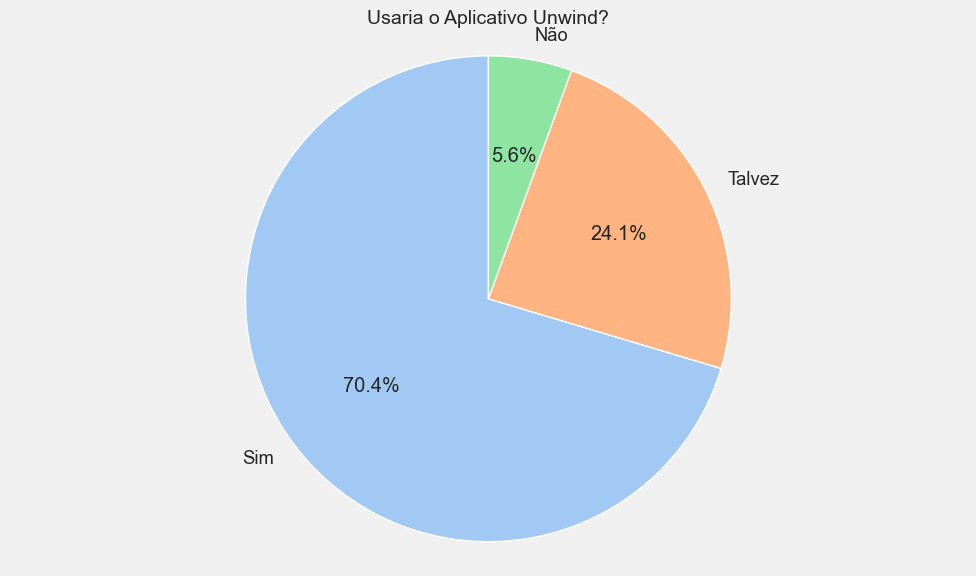

Distribuição de Intenção de Uso:
Sim: 38 respondentes (70.4%)
Talvez: 13 respondentes (24.1%)
Não: 3 respondentes (5.6%)


In [11]:
plt.figure(figsize=(10, 6))

usaria_counts = df['usaria_app'].value_counts()

plt.pie(usaria_counts, labels=usaria_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("pastel"))
plt.title('Usaria o Aplicativo Unwind?', fontsize=14)
plt.axis('equal')

plt.tight_layout()

plt.savefig('../images/would_use_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Intenção de Uso:")
for usaria, count in usaria_counts.items():
    percentage = (count / total) * 100
    print(f"{usaria}: {count} respondentes ({percentage:.1f}%)")

#### Would Use Unwind Distribution Description

- A strong majority of respondents (70.4%, n=38) indicated they "Sim" (yes) would use the Unwind application if it became available.
- Approximately one-quarter (24.1%, n=13) responded "Talvez" (maybe), suggesting they are open to trying the platform but have some reservations or need more information.
- Only a small minority (5.6%, n=3) stated "Não" (no), they would not use the application.
- The combined total of definite and potential users (94.5%) demonstrates a very high level of potential adoption among the surveyed population.
- This overwhelmingly positive response to usage intention correlates with the favorable opinions about the platform concept observed in the previous question.
- The high percentage of positive responses suggests that if the application is developed according to the described concept, it could see significant user adoption among the target demographic.

### Would Recommend Unwind (Indicaria o App)

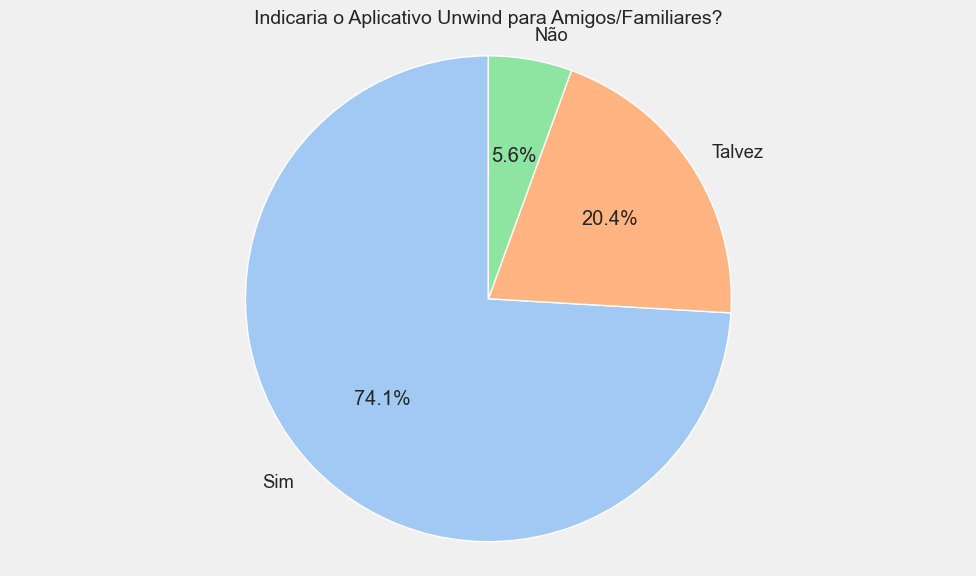

Distribuição de Intenção de Recomendar:
Sim: 40 respondentes (74.1%)
Talvez: 11 respondentes (20.4%)
Não: 3 respondentes (5.6%)


In [12]:
plt.figure(figsize=(10, 6))

indicaria_counts = df['indicaria_app'].value_counts()

plt.pie(indicaria_counts, labels=indicaria_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("pastel"))
plt.title('Indicaria o Aplicativo Unwind para Amigos/Familiares?', fontsize=14)
plt.axis('equal')

plt.tight_layout()

plt.savefig('../images/would_recommend_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Intenção de Recomendar:")
for indicaria, count in indicaria_counts.items():
    percentage = (count / total) * 100
    print(f"{indicaria}: {count} respondentes ({percentage:.1f}%)")

#### Would Recommend Unwind Distribution Description

- An even stronger majority of respondents (74.1%, n=40) indicated they would "Sim" (yes) recommend the Unwind application to friends or family members.
- Approximately one-fifth (20.4%, n=11) responded "Talvez" (maybe), suggesting they might recommend the platform depending on their experience with it or the needs of the person they're recommending to.
- Only a small minority (5.6%, n=3) stated "Não" (no), they would not recommend the application.
- The percentage of respondents willing to recommend the platform (74.1%) is slightly higher than those who would personally use it (70.4%), suggesting some respondents see value in the platform even if they themselves might not be the primary users.
- The combined total of definite and potential recommenders (94.5%) matches exactly the percentage of definite and potential users, demonstrating consistency in the responses.
- This high willingness to recommend indicates the potential for organic growth through word-of-mouth if the platform delivers on its promised features and user experience.

### Opinion on Book Inclusion (Inclusão de Livros)

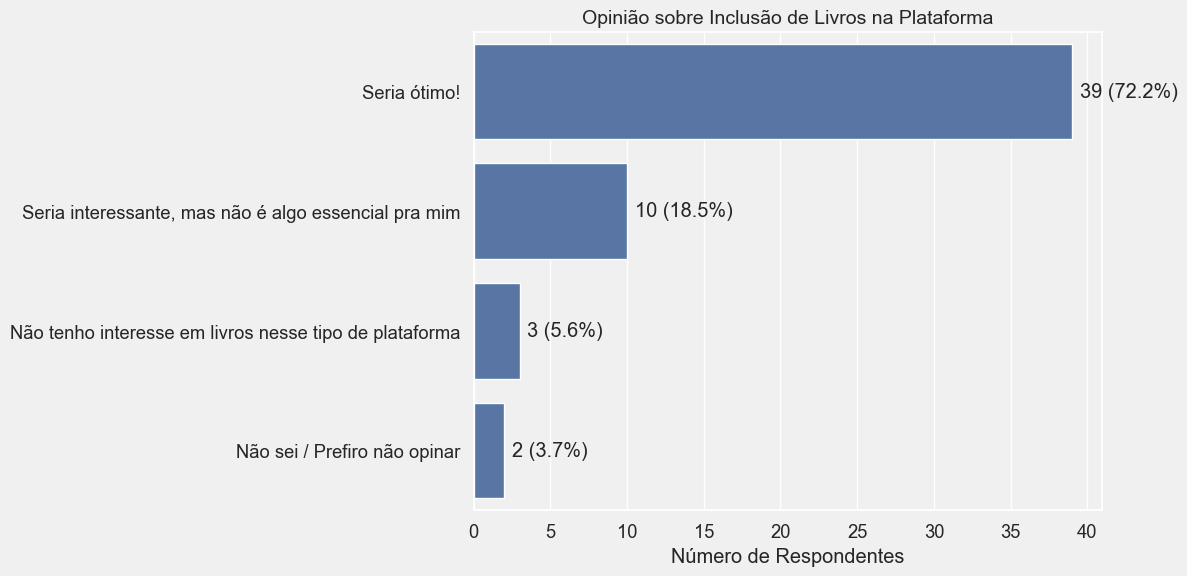

Distribuição de Opinião sobre Inclusão de Livros:
Seria ótimo!: 39 respondentes (72.2%)
Seria interessante, mas não é algo essencial pra mim: 10 respondentes (18.5%)
Não tenho interesse em livros nesse tipo de plataforma: 3 respondentes (5.6%)
Não sei / Prefiro não opinar: 2 respondentes (3.7%)


In [13]:
plt.figure(figsize=(12, 6))

livros_order = [
    'Seria ótimo!', 
    'Seria interessante, mas não é algo essencial pra mim', 
    'Não tenho interesse em livros nesse tipo de plataforma',
    'Não sei / Prefiro não opinar'
]

livros_counts = df['inclusao_livros'].value_counts().reindex(livros_order).dropna()

sns.barplot(y=livros_counts.index, x=livros_counts.values)
plt.title('Opinião sobre Inclusão de Livros na Plataforma', fontsize=14)
plt.xlabel('Número de Respondentes')
plt.ylabel('')

total = len(df)
for i, count in enumerate(livros_counts.values):
    percentage = (count / total) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/book_inclusion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Opinião sobre Inclusão de Livros:")
for livros, count in livros_counts.items():
    percentage = (count / total) * 100
    print(f"{livros}: {count} respondentes ({percentage:.1f}%)")

#### Opinion on Book Inclusion Distribution Description

- There is overwhelming support for adding books to the Unwind platform:
    - A strong majority (72.2%, n=39) responded "Seria ótimo!" (would be great!), indicating enthusiasm for book inclusion.
    - Another 18.5% (n=10) stated it "Seria interessante, mas não é algo essencial pra mim" (would be interesting, but not essential for me), showing positive but more moderate interest.
    - Combined, 90.7% of respondents expressed some level of positive sentiment toward including books.

- Only a small minority expressed disinterest or uncertainty:
    - 5.6% (n=3) indicated "Não tenho interesse em livros nesse tipo de plataforma" (no interest in books on this type of platform).
    - 3.7% (n=2) responded "Não sei / Prefiro não opinar" (don't know / prefer not to comment).

- The strong positive response suggests that expanding the Unwind platform to include books would be well-received by the target audience and could be a valuable feature to implement in future iterations of the platform.

- This high interest in book inclusion may also indicate that respondents view Unwind as a comprehensive entertainment tracking platform rather than one limited to visual media, potentially expanding its market appeal.

### Preferred Features (Funcionalidades)

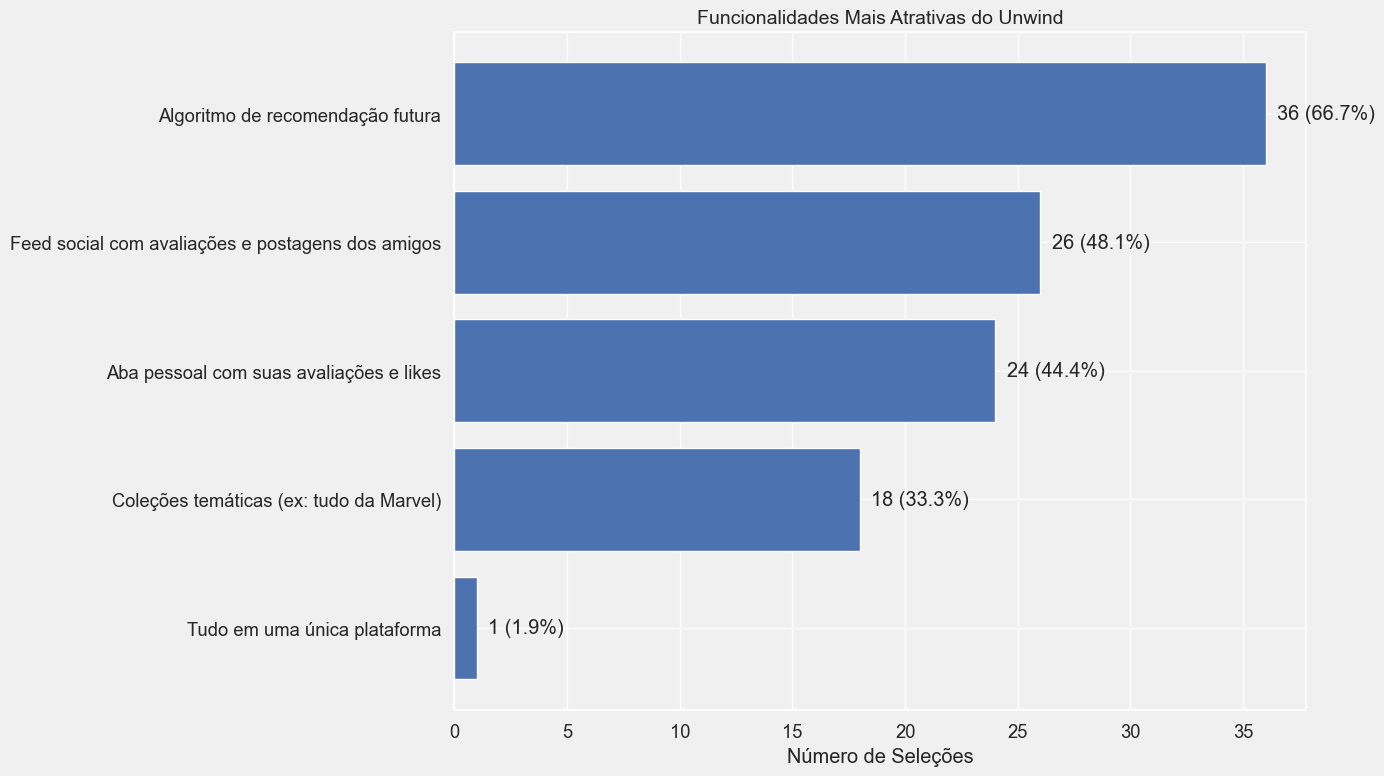

Distribuição de Funcionalidades Preferidas:
Tudo em uma única plataforma: 1 seleções (1.9%)
Coleções temáticas (ex: tudo da Marvel): 18 seleções (33.3%)
Aba pessoal com suas avaliações e likes: 24 seleções (44.4%)
Feed social com avaliações e postagens dos amigos: 26 seleções (48.1%)
Algoritmo de recomendação futura: 36 seleções (66.7%)


In [14]:
plt.figure(figsize=(14, 8))

features = [
    'Algoritmo de recomendação futura', 
    'Feed social com avaliações e postagens dos amigos',
    'Aba pessoal com suas avaliações e likes',
    'Coleções temáticas (ex: tudo da Marvel)',
    'Tudo em uma única plataforma'
]

counts = [36, 26, 24, 18, 1] 

# Calcular porcentagens
total_respondents = 54  # Total de respondentes
percentages = [(count / total_respondents) * 100 for count in counts]

# Criar um DataFrame para facilitar a ordenação
features_df = pd.DataFrame({
    'feature': features,
    'count': counts,
    'percentage': percentages
})

# Ordenar por contagem (crescente para visualização horizontal)
features_df = features_df.sort_values('count')

# Criar gráfico de barras horizontal
plt.barh(features_df['feature'], features_df['count'])
plt.title('Funcionalidades Mais Atrativas do Unwind', fontsize=14)
plt.xlabel('Número de Seleções')
plt.ylabel('')

# Adicionar rótulos com contagem e porcentagem
for i, row in enumerate(features_df.itertuples()):
    plt.text(row.count + 0.5, i, f"{row.count} ({row.percentage:.1f}%)", va='center')

plt.tight_layout()

# Salvar a figura
plt.savefig('../images/preferred_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Funcionalidades Preferidas:")
for _, row in features_df.iterrows():
    print(f"{row['feature']}: {row['count']} seleções ({row['percentage']:.1f}%)")

#### Preferred Features Distribution Description

- The feature that attracted the most attention among respondents was the "Algoritmo de recomendação futura" (future recommendation algorithm), selected by 65.5% (n=36) of participants, highlighting the importance of personalized content discovery.

- The "Feed social com avaliações e postagens dos amigos" (social feed with friends' ratings and posts) was the second most popular feature, chosen by 47.3% (n=26) of respondents, demonstrating strong interest in the social aspects of the platform.

- The "Aba pessoal com suas avaliações e likes" (personal tab with ratings and likes) was selected by 43.6% (n=24) of participants, showing significant interest in personal content organization and tracking.

- "Coleções temáticas (ex: tudo da Marvel)" (thematic collections, e.g., everything from Marvel) attracted 32.7% (n=18) of respondents, indicating interest in content categorization by franchises or themes.

- A small percentage (1.8%, n=1) mentioned "Tudo em uma única plataforma" (everything in a single platform) as an attractive feature, suggesting that the all-in-one nature of the platform is also appealing, albeit to a lesser extent.

- The results indicate that users value both algorithmic features (recommendations) and social aspects (friend interactions), with personal organization features following closely behind.

- The preference distribution suggests that a successful implementation of Unwind should prioritize robust recommendation algorithms while also incorporating strong social and personal tracking features.

### Preferred Features (Funcionalidades)

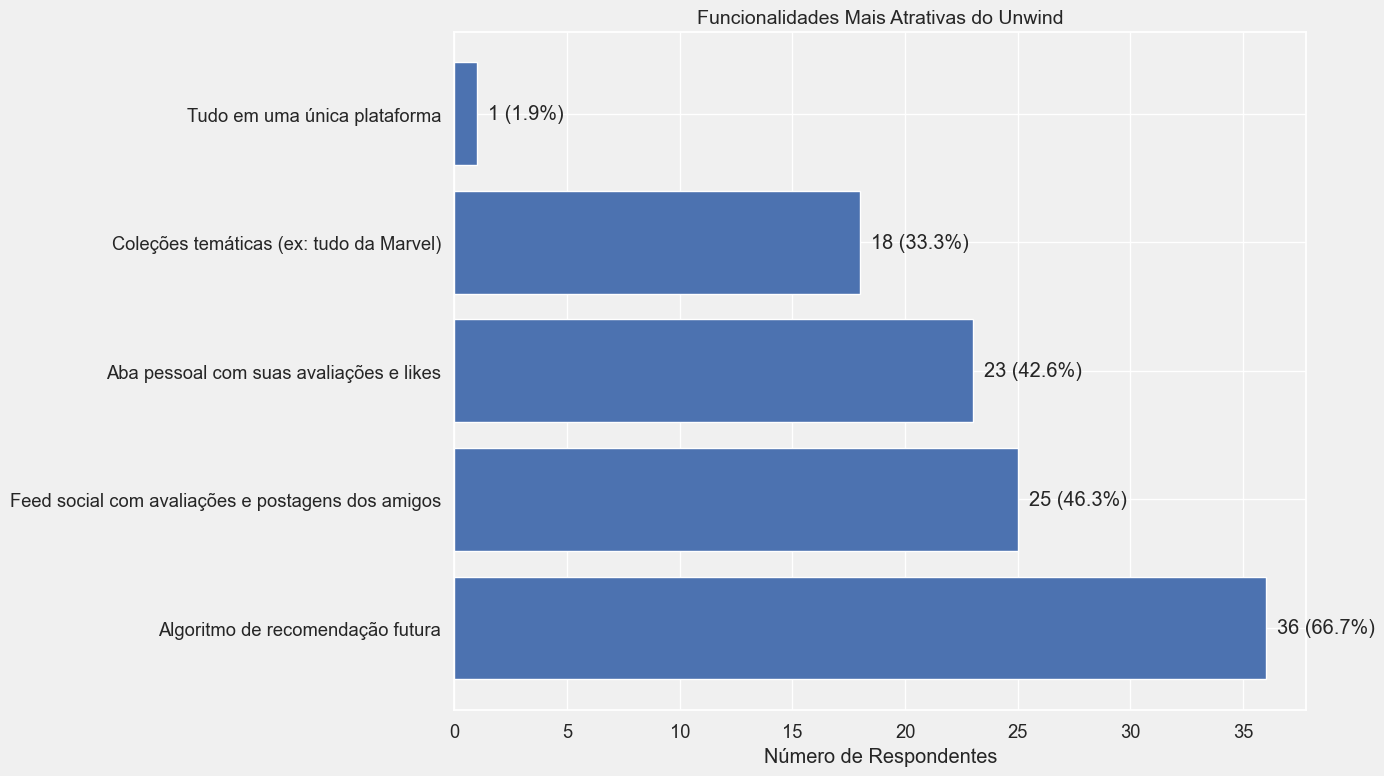

Distribuição de Funcionalidades Preferidas:
Algoritmo de recomendação futura: 36 respondentes (66.7%)
Feed social com avaliações e postagens dos amigos: 25 respondentes (46.3%)
Aba pessoal com suas avaliações e likes: 23 respondentes (42.6%)
Coleções temáticas (ex: tudo da Marvel): 18 respondentes (33.3%)
Tudo em uma única plataforma: 1 respondentes (1.9%)


In [15]:
plt.figure(figsize=(14, 8))
 
def count_features(series):
    features = {}
    for item in series.dropna():
        for feature in item.split(';'):
            feature = feature.strip()
            if feature in features:
                features[feature] += 1
            else:
                features[feature] = 1
    return pd.Series(features).sort_values(ascending=False)

feature_counts = count_features(df['funcionalidades'])

plt.barh(range(len(feature_counts)), feature_counts.values)
plt.yticks(range(len(feature_counts)), feature_counts.index)
plt.title('Funcionalidades Mais Atrativas do Unwind', fontsize=14)
plt.xlabel('Número de Respondentes')
plt.ylabel('')

total_respondents = len(df)
for i, (feature, count) in enumerate(feature_counts.items()):
    percentage = (count / total_respondents) * 100
    plt.text(count + 0.5, i, f"{count} ({percentage:.1f}%)", va='center')

plt.tight_layout()

plt.savefig('../images/preferred_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Funcionalidades Preferidas:")
for feature, count in feature_counts.items():
    percentage = (count / total_respondents) * 100
    print(f"{feature}: {count} respondentes ({percentage:.1f}%)")

#### Preferred Features Distribution Description

- The most attractive feature to respondents is the "Algoritmo de recomendação futura" (future recommendation algorithm), selected by a significant majority (66.7%, n=36).
- The social elements of the platform are also highly valued:
    - "Feed social com avaliações e postagens dos amigos" (social feed with friends' ratings and posts) was chosen by 46.3% (n=25)
    - "Aba pessoal com suas avaliações e likes" (personal tab with ratings and likes) was selected by 42.6% (n=23)
- "Coleções temáticas" (thematic collections, e.g., Marvel content) appealed to a third of respondents (33.3%, n=18).
- One respondent (1.9%) specifically mentioned valuing having "Tudo em uma única plataforma" (everything in a single platform).
- These preferences highlight that users value both personalization (through the recommendation algorithm) and social interaction (through sharing and seeing friends' activities) in an entertainment platform.
- The high preference for the recommendation algorithm suggests that users are looking for discovery features to help them find new content based on their tastes.
- The relative popularity of all four main features (each selected by at least a third of respondents) indicates that the Unwind platform's multi-faceted approach resonates with potential users.

## Univariate Analysis: Quantitative Variables

### Age (Idade)

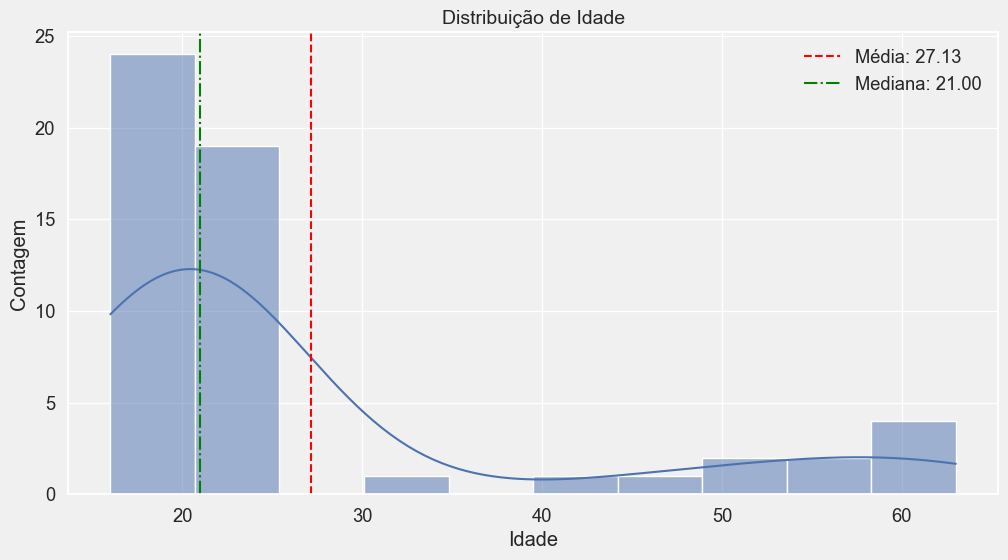

Estatísticas de Idade:
count: 54.00
mean: 27.13
std: 14.14
min: 16.00
25%: 20.00
50%: 21.00
75%: 23.75
max: 63.00


In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='idade', bins=10, kde=True)
plt.title('Distribuição de Idade', fontsize=14)
plt.xlabel('Idade')
plt.ylabel('Contagem')
mean_age = df['idade'].mean()
median_age = df['idade'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Média: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-.', label=f'Mediana: {median_age:.2f}')
plt.legend()
plt.savefig('../images/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


print("Estatísticas de Idade:")
age_stats = df['idade'].describe()
for stat, value in age_stats.items():
    print(f"{stat}: {value:.2f}")

#### Age Distribution Description

- The age distribution ranges from 16 to 63 years.
- The mean age is 27.13 years, while the median is 21 years.
- The standard deviation is 14.14 years, indicating considerable variability.
- The distribution is right-skewed, with most respondents concentrated in the younger age brackets.
- There appears to be a higher frequency of respondents around 18-22 years.
- A smaller number of respondents are distributed across the older age categories (40-63 years).

### Weekly Entertainment Days (Dias de Entretenimento)

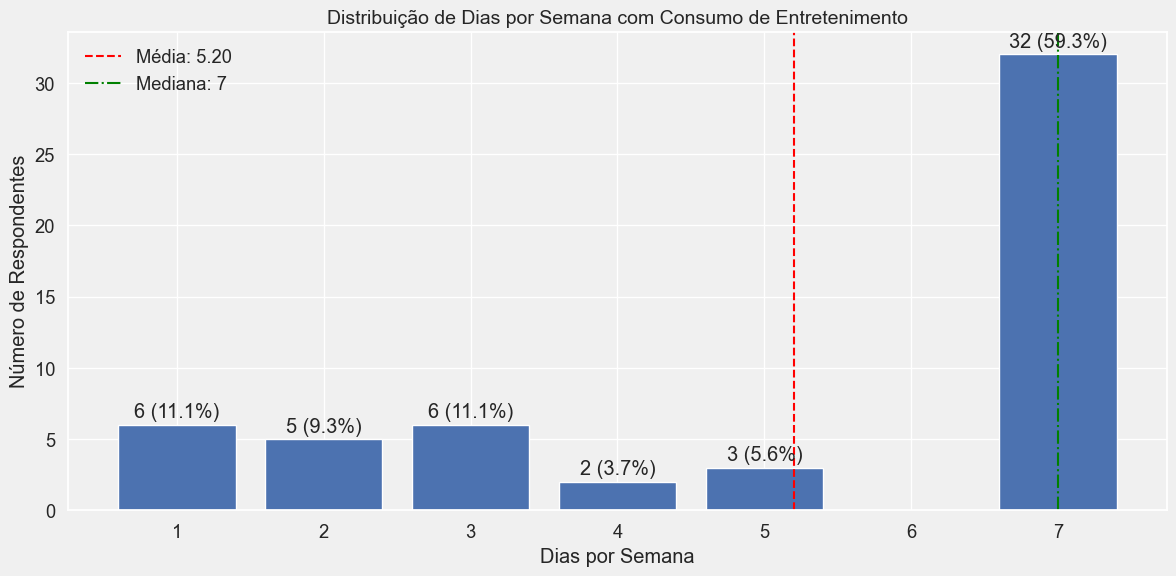

Distribuição de Dias de Entretenimento por Semana:
1 dias: 6 respondentes (11.1%)
2 dias: 5 respondentes (9.3%)
3 dias: 6 respondentes (11.1%)
4 dias: 2 respondentes (3.7%)
5 dias: 3 respondentes (5.6%)
7 dias: 32 respondentes (59.3%)

Estatísticas descritivas:
count: 54.00
mean: 5.20
std: 2.35
min: 1.00
25%: 3.00
50%: 7.00
75%: 7.00
max: 7.00


In [17]:
plt.figure(figsize=(12, 6))

dias_counts = df['dias_entretenimento'].value_counts().sort_index()

plt.bar(dias_counts.index, dias_counts.values)
plt.title('Distribuição de Dias por Semana com Consumo de Entretenimento', fontsize=14)
plt.xlabel('Dias por Semana')
plt.ylabel('Número de Respondentes')
plt.xticks(range(1, 8))  

total = len(df)
for i, (idx, count) in enumerate(dias_counts.items()):
    percentage = (count / total) * 100
    plt.text(idx, count + 0.5, f"{count} ({percentage:.1f}%)", ha='center')

mean_val = df['dias_entretenimento'].mean()
median_val = df['dias_entretenimento'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.0f}')
plt.legend()

plt.tight_layout()

plt.savefig('../images/entertainment_days_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribuição de Dias de Entretenimento por Semana:")
for dias, count in dias_counts.items():
    percentage = (count / total) * 100
    print(f"{dias} dias: {count} respondentes ({percentage:.1f}%)")

dias_stats = df['dias_entretenimento'].describe()
print("\nEstatísticas descritivas:")
for stat, value in dias_stats.items():
    print(f"{stat}: {value:.2f}")

#### Weekly Entertainment Days Distribution Description

- A significant majority (59.3%, n=32) of respondents consume entertainment content every day of the week (7 days)
- The remaining respondents are distributed across fewer days, with notable frequencies at:
   - 1 day per week: 11.1% (n=6)
   - 3 days per week: 11.1% (n=6)
   - 2 days per week: 9.3% (n=5)
 - The lowest frequencies are at 4 days (3.7%, n=2) and 5 days (5.6%, n=3)
 - Notably, no respondents selected 6 days per week

- The median value is 7 days, while the mean is 5.2 days, indicating the left-skewed nature of the distribution.
- The standard deviation is 2.35 days, reflecting the considerable spread in entertainment consumption patterns.


- This distribution reveals two distinct patterns of media consumption:
  - A large group of daily entertainment consumers (likely heavy users)
  - A smaller group of occasional consumers who engage with entertainment only a few days per week

- The predominance of daily entertainment consumption suggests a strong potential user base for the Unwind platform, which focuses on organizing and enhancing entertainment experiences.

### Weekly Movie Hours (Horas de Filmes)

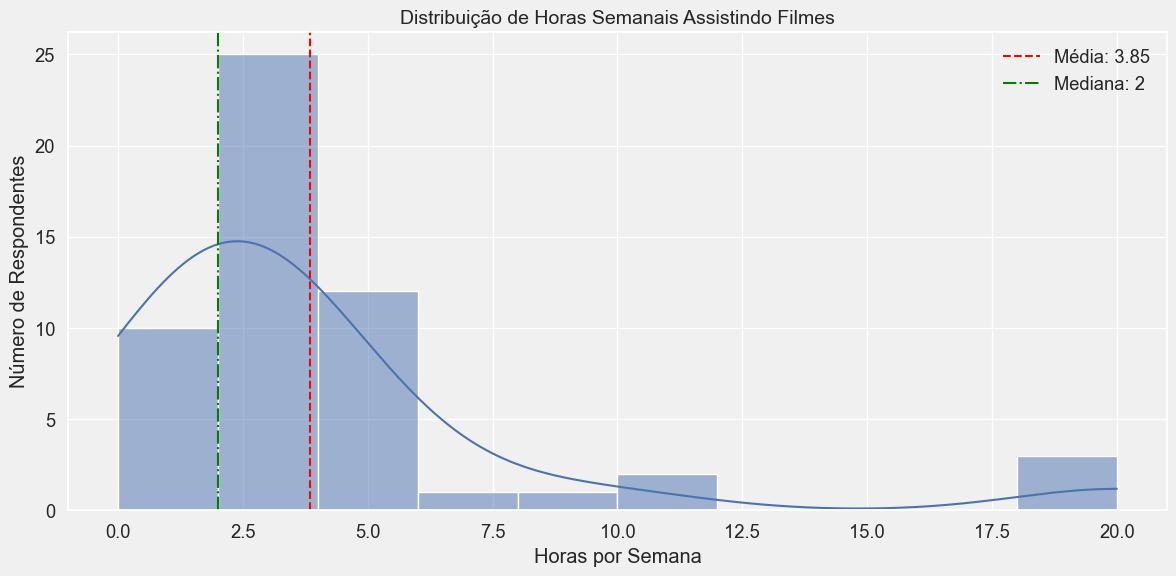

Estatísticas descritivas - Horas de Filmes por Semana:
count: 54.00
mean: 3.85
std: 4.53
min: 0.00
25%: 2.00
50%: 2.00
75%: 4.00
max: 20.00


In [18]:
plt.figure(figsize=(12, 6))

sns.histplot(df['horas_filmes'], kde=True, bins=10)
plt.title('Distribuição de Horas Semanais Assistindo Filmes', fontsize=14)
plt.xlabel('Horas por Semana')
plt.ylabel('Número de Respondentes')

mean_val = df['horas_filmes'].mean()
median_val = df['horas_filmes'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.0f}')
plt.legend()

plt.tight_layout()

plt.savefig('../images/movie_hours_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

film_stats = df['horas_filmes'].describe()
print("Estatísticas descritivas - Horas de Filmes por Semana:")
for stat, value in film_stats.items():
    print(f"{stat}: {value:.2f}")

#### Weekly Movie Hours Distribution Description

- The distribution of weekly hours spent watching movies shows a strong right-skewed pattern with the majority of respondents concentrated in the lower range:
    - Most respondents watch 0-5 hours of movies per week
    - The highest frequency is around 2-3 hours per week
    - There are progressively fewer respondents as the number of hours increases
    - A small number of respondents watch 10+ hours of movies weekly, creating a long right tail

- The central tendency measures differ notably:
    - Median: 2 hours per week (50% of respondents watch 2 or fewer hours)
    - Mean: 3.85 hours per week (higher than the median due to the right skew)

- Dispersion measures indicate high variability:
    - Standard deviation: 4.53 hours, which is larger than the mean
    - The range is quite wide: from 0 hours to 20 hours
    - Interquartile range (IQR): 2 hours (25th percentile) to 4 hours (75th percentile)

- This distribution pattern suggests that while most respondents are moderate movie watchers, there is a subset of heavy viewers who significantly influence the average.

- For the Unwind platform, this indicates a need to accommodate diverse usage patterns, from casual viewers (the majority) to enthusiasts who dedicate substantial time to watching movies.

### Weekly Series Hours (Horas de Séries)

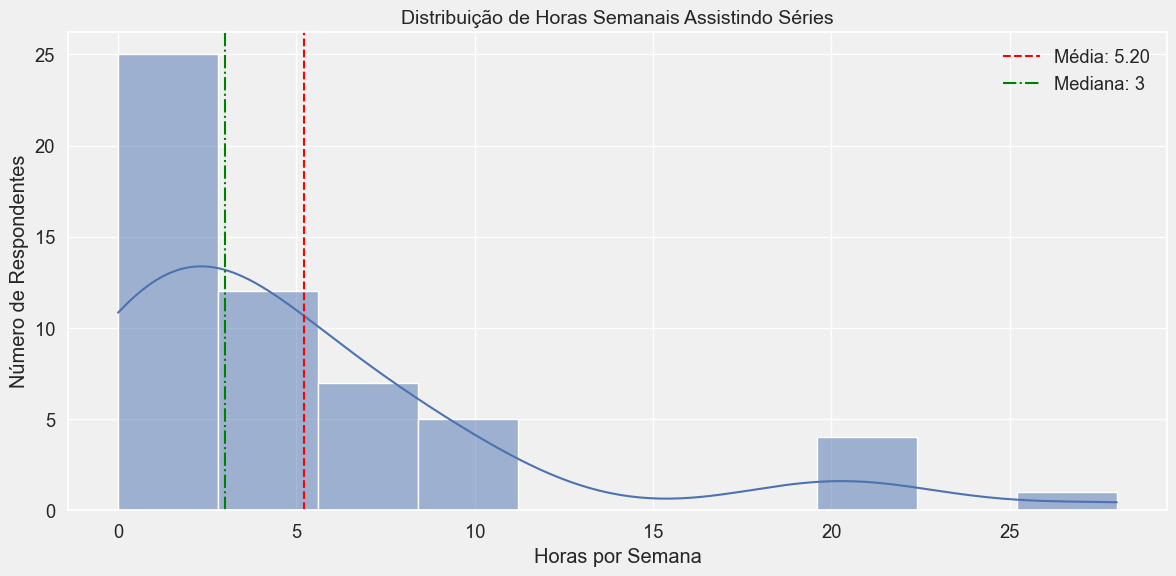

Estatísticas descritivas - Horas de Séries por Semana:
count: 54.00
mean: 5.20
std: 6.17
min: 0.00
25%: 1.00
50%: 3.00
75%: 6.75
max: 28.00


In [19]:
plt.figure(figsize=(12, 6))

sns.histplot(df['horas_series'], kde=True, bins=10)
plt.title('Distribuição de Horas Semanais Assistindo Séries', fontsize=14)
plt.xlabel('Horas por Semana')
plt.ylabel('Número de Respondentes')

mean_val = df['horas_series'].mean()
median_val = df['horas_series'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.0f}')
plt.legend()

plt.tight_layout()

plt.savefig('../images/series_hours_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

series_stats = df['horas_series'].describe()
print("Estatísticas descritivas - Horas de Séries por Semana:")
for stat, value in series_stats.items():
    print(f"{stat}: {value:.2f}")

#### Weekly Series Hours Distribution Description

- The distribution of weekly hours spent watching series shows a strong right-skewed pattern similar to, but more pronounced than, the movie-watching distribution:
    - The highest concentration of respondents is in the 0-5 hours range
    - A notable decline occurs after 5 hours, with progressively fewer respondents at higher hourly amounts
    - Small clusters of heavy viewers appear around 20 and 25+ hours per week

- Central tendency measures indicate the right-skewed nature of the distribution:
    - Median: 3 hours per week (50% of respondents watch 3 or fewer hours)
    - Mean: 5.20 hours per week (higher than the median due to the influence of heavy viewers)

- The dispersion measures reveal considerable variability:
    - Standard deviation: 6.17 hours (greater than the mean)
    - Range: 0 to 28 hours per week
    - Interquartile range (IQR): 1 hour (25th percentile) to 6.75 hours (75th percentile)

- The wider IQR for series (5.75 hours) compared to movies (2 hours) suggests greater variability in series-watching behavior among the middle 50% of respondents.

- This distribution reveals that while most respondents are moderate series viewers, there is a more significant segment of heavy viewers compared to movie consumption, which explains the higher mean viewing time despite similar medians.

- The pattern suggests that series content may generate more diverse viewing patterns than movies, with some users likely binge-watching entire seasons, while others maintain more casual viewing habits.

### Weekly Gaming Hours (Horas de Jogos)

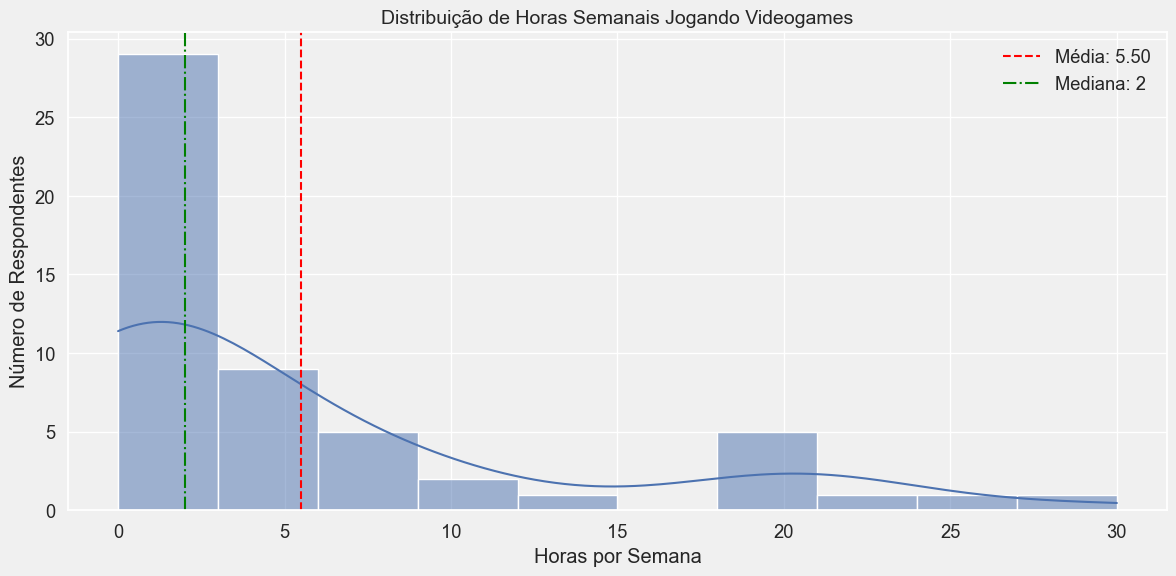

Estatísticas descritivas - Horas de Jogos por Semana:
count: 54.00
mean: 5.50
std: 7.73
min: 0.00
25%: 0.00
50%: 2.00
75%: 8.00
max: 30.00


In [20]:
plt.figure(figsize=(12, 6))

sns.histplot(df['horas_jogos'], kde=True, bins=10)
plt.title('Distribuição de Horas Semanais Jogando Videogames', fontsize=14)
plt.xlabel('Horas por Semana')
plt.ylabel('Número de Respondentes')

mean_val = df['horas_jogos'].mean()
median_val = df['horas_jogos'].median()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.0f}')
plt.legend()

plt.tight_layout()

plt.savefig('../images/gaming_hours_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

gaming_stats = df['horas_jogos'].describe()
print("Estatísticas descritivas - Horas de Jogos por Semana:")
for stat, value in gaming_stats.items():
    print(f"{stat}: {value:.2f}")

#### Weekly Gaming Hours Distribution Description

- The distribution of weekly hours spent playing videogames shows the most extreme right-skew of all entertainment types analyzed:
    - A large concentration of respondents report 0 hours of gaming
    - There is a steep decline after 0 hours, with progressively fewer respondents as gaming hours increase
    - Several smaller clusters appear at higher hour ranges (around 10, 20, and 30 hours)

- The central tendency measures highlight the significant skew:
     - Median: 2 hours per week (50% of respondents play 2 or fewer hours)
    - Mean: 5.50 hours per week (considerably higher than the median)
    - The large difference between mean and median indicates strong influence from heavy gamers

- Dispersion measures reveal high variability:
    - Standard deviation: 7.73 hours (larger than the mean)
    - Range: 0 to 30 hours per week
    - Interquartile range (IQR): 0 hours (25th percentile) to 8 hours (75th percentile)

- The distribution reveals a clear polarization in gaming behavior:
    - A substantial number of non-gamers (0 hours)
    - A segment of casual gamers (1-10 hours per week)
    - A smaller but significant group of dedicated gamers (15+ hours per week)

- This pattern differs notably from movies and series consumption, showing more extreme divisions between non-users and heavy users.

- The 25th percentile at 0 hours confirms that a significant portion of respondents do not engage with gaming at all, which is an important consideration for the Unwind platform's gaming-related features.